<a href="https://colab.research.google.com/github/armirchandani/credit-card-fraud-detection/blob/main/CreditCardFraudDectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [10]:
# Loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/creditcard_.csv')

In [11]:
# First 5 rows of the dataset
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [12]:
# Last 5 rows of the dataset
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14715,14715,-0.428360,-0.508899,1.471539,-1.099461,0.172518,0.522053,0.294674,0.008979,1.080264,...,-0.174106,-0.401961,-0.361053,-0.649744,-0.317645,1.693234,-0.260267,-0.085401,19831.84,0.0
14716,14716,-0.002075,-0.142446,1.835696,-0.653303,0.227844,-0.174237,0.854451,-0.254598,0.629906,...,-0.248099,-0.559964,-0.066238,1.430847,-0.519729,0.020501,-0.182471,-0.751394,5617.21,0.0
14717,14717,-0.146662,-0.283936,2.258309,-0.043318,0.026620,1.490573,0.113113,0.158796,0.492452,...,-0.044229,0.496603,0.014019,-1.028885,-0.918390,1.665959,-0.166750,-0.104518,866.37,0.0
14718,14718,-0.146065,-0.187647,1.452295,-1.484024,0.269098,0.127047,0.632643,-0.128910,0.427663,...,-0.134540,-0.163771,-0.122974,0.147554,-0.497035,1.492916,0.208027,0.470159,2611.85,0.0
14719,14719,-0.097747,-0.256180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14720 non-null  int64  
 1   V1      14720 non-null  float64
 2   V2      14720 non-null  float64
 3   V3      14719 non-null  float64
 4   V4      14719 non-null  float64
 5   V5      14719 non-null  float64
 6   V6      14719 non-null  float64
 7   V7      14719 non-null  float64
 8   V8      14719 non-null  float64
 9   V9      14719 non-null  float64
 10  V10     14719 non-null  float64
 11  V11     14719 non-null  float64
 12  V12     14719 non-null  float64
 13  V13     14719 non-null  float64
 14  V14     14719 non-null  float64
 15  V15     14719 non-null  float64
 16  V16     14719 non-null  float64
 17  V17     14719 non-null  float64
 18  V18     14719 non-null  float64
 19  V19     14719 non-null  float64
 20  V20     14719 non-null  float64
 21  V21     14719 non-null  float64
 22

In [14]:
# Checking the number of missing values in each column
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [38]:
# Spliting data into features and targets variables
X = df.drop(['id','Class'], axis=1, errors='ignore')
Y = df['Class'] #target variable

In [39]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [40]:
# Spliting data into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(11776, 29)

In [42]:
X_test.shape

(2944, 29)

In [43]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
print(pd.Series(Y_train).value_counts(normalize=True))

Class
0.0    0.995924
1.0    0.004076
Name: proportion, dtype: float64


In [45]:
# Training the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

In [46]:
# Fitting the model with the prepared training data
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [51]:
# Making predictions
Y_pred = rf_model.predict(X_test_scaled)

# Convert Y_test and Y_pred to integer type just in case
Y_test = Y_test.astype(int)
Y_pred = Y_pred.astype(int)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      0.85      0.92        13

    accuracy                           1.00      2944
   macro avg       1.00      0.92      0.96      2944
weighted avg       1.00      1.00      1.00      2944



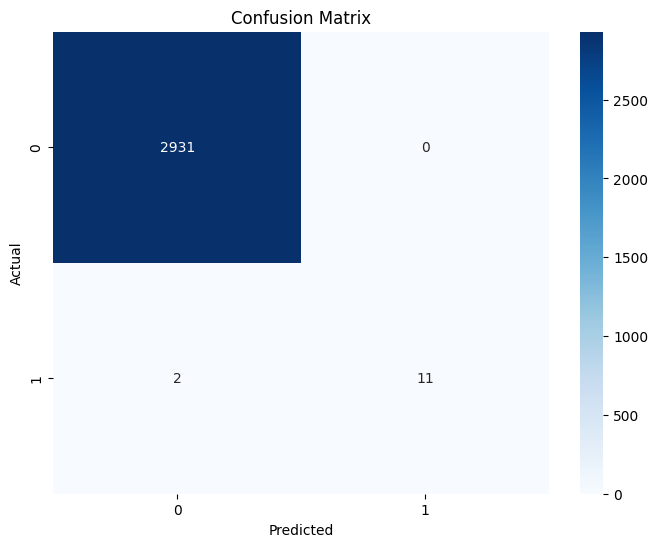

In [52]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Feature Importance
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

In [55]:
feature_imp.head()

,Feature,Importance
11,V12,0.133706
10,V11,0.120040
9,V10,0.111304
13,V14,0.086365
3,V4,0.085389


from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Importance', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

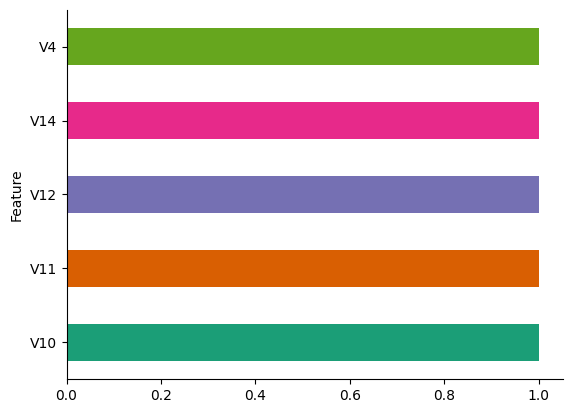

In [59]:
# Categorical Distribution
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

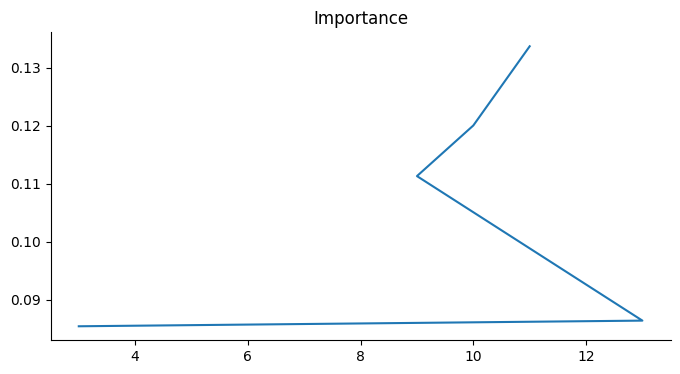

In [58]:
# Values
from matplotlib import pyplot as plt
_df_2['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

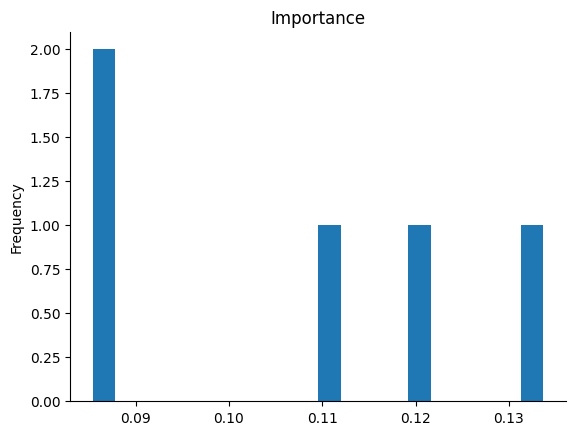

In [57]:
# Distribution
from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

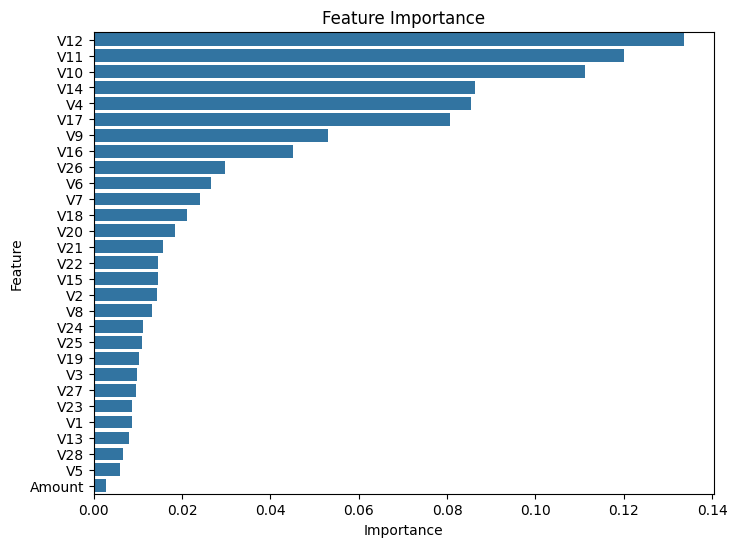

In [60]:
# Feature Important
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

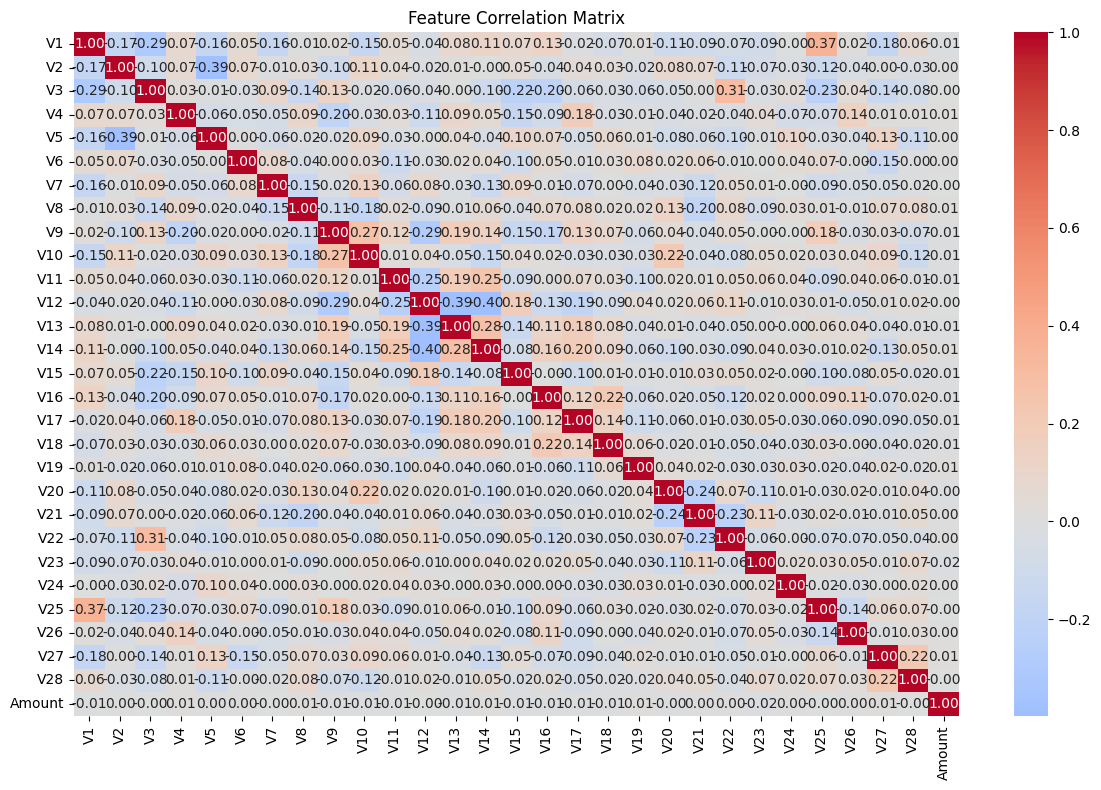

In [65]:
# Heatmap
plt. figure(figsize=(12, 8))
correlation_matrix = X. corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt. show()

In [70]:
# ROC AUC
Y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr,_= roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

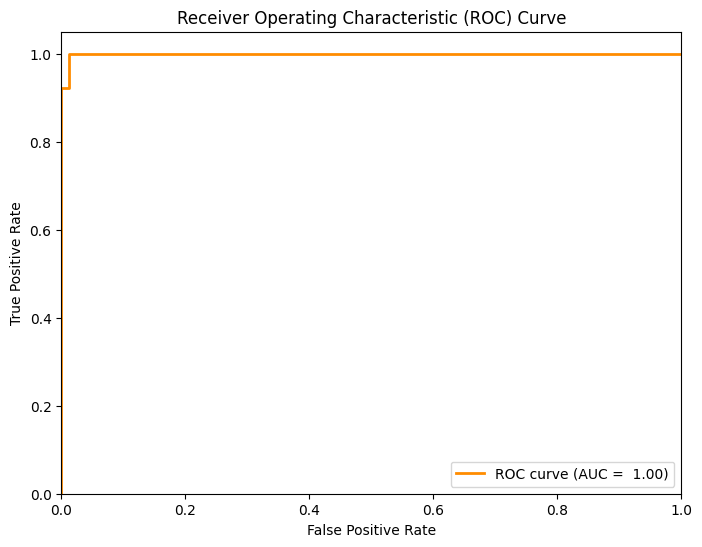

In [81]:
#Visualization of ROC AUC
plt. figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color='navy',lw=2, linestyle='')
plt.xlim( [0.0, 1.0])
plt.ylim( [0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate' )
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()